In [2]:
#Bismillah   Hirahmanirahim

## Background:

**The data we are going to work on today is retreived from UK CAA Flight Punctuality Statistics.** <br>
* This data has detail about **the flight routes from one airport to another airport**.<br>
* It involves data of **British and Non British, Airports and Airlines**.<br>
* The data has **flights departed from the UK and arrived in the UK.** <br>
* It also tells if a **flight is Chartered or Scheduled.**<br>
* It contains data about **number of flight on a specific route and the percentage of flights delayed on that route with Average Delay and Cancelled.**<br>

## Objectives:

* We have to clean the data and make it ready for analysis. <br>
* We will observe the distribution of the data. <br>
* We will discuss the Average Delay by Minutes for each Month <br>
* We have to find the Number of Flights Delayed and Cancelled of each airline.<br>
* We have to find the Percentage of Flights Delayed and Cancelled groupby Airlines. <br>
* We have to find the Percentage of Flight Share among Airports in the UK <br>
* We have to find the Average Delay in Minutes by Month at an Airport in the UK <br>
* We have to find the Percentage of Number of Flights Delayed at an Airport in the UK <br>


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
june = pd.read_csv('June_22.csv')
july = pd.read_csv('July_22.csv')
june.head(5)

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,actual_flights_unmatched,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,14/06/2022 17:02,202204,ABERDEEN,CANADA,TORONTO,SUNWING AIRLINES INC,A,C,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.0,0,0.000000,NaN
1,14/06/2022 17:02,202204,ABERDEEN,POLAND,GDANSK,WIZZ AIR,A,S,8,0,...,25.000000,0.000000,0.000000,0.0,0.0,0.0,25.0,0,0.000000,NaN
2,14/06/2022 17:02,202204,ABERDEEN,POLAND,GDANSK,WIZZ AIR,D,S,8,0,...,25.000000,0.000000,0.000000,0.0,0.0,0.0,31.0,0,0.000000,NaN
3,14/06/2022 17:02,202204,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,A,C,1,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,30.0,0,0.000000,NaN
4,14/06/2022 17:02,202204,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,A,S,29,0,...,13.793103,3.448276,10.344828,0.0,0.0,0.0,51.0,6,16.666667,37.0


# Structure Analysis

In [5]:
june.shape, july.shape

((5232, 26), (6234, 26))

**Observation:**<br>
We have 26 columns in the dataframe. <br>
And more than 11,500 rows in the dataframe. <br>

In [6]:
june.describe()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
count,5232.0,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,4894.000000,5232.000000,5232.000000,1191.000000
mean,202204.0,24.650038,0.000573,0.292240,5.237360,23.633235,32.608709,13.020153,10.531367,5.657848,1.329490,0.628923,0.135740,0.019675,1.635572,20.336126,3.025229,19.052226,9.848027
std,0.0,33.757182,0.030911,0.946693,13.943659,22.242178,23.880010,15.894283,15.054727,12.412201,5.483791,3.771381,1.764369,1.383093,9.875408,30.263898,9.016507,37.285909,31.297643
min,202204.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202204.0,5.000000,0.000000,0.000000,0.000000,0.000000,16.354360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
50%,202204.0,13.000000,0.000000,0.000000,0.000000,22.222222,31.818182,10.714286,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,3.000000
75%,202204.0,30.000000,0.000000,0.000000,1.960784,36.666667,46.153846,19.230769,14.444444,6.976744,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,10.000000
max,202204.0,344.000000,2.000000,15.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1492.000000,90.000000,100.000000,447.000000


In [7]:
july.describe()

,reporting_period,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,flights_15_minutes_early_to_1_minute_early_percent,flights_0_to_15_minutes_late_percent,flights_between_16_and_30_minutes_late_percent,flights_between_31_and_60_minutes_late_percent,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
count,6234.0,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,5820.000000,6234.000000,6234.000000,1696.000000
mean,202205.0,23.790825,0.002567,0.361726,3.746976,18.051332,29.625203,14.541755,13.926588,8.765548,2.387760,1.118710,0.314959,0.100195,2.127423,29.619072,3.724896,23.623645,6.873821
std,0.0,34.075946,0.056587,1.259478,10.878369,19.889943,22.476367,16.355048,16.842925,14.524949,7.199854,5.136126,2.587506,2.902372,11.611187,34.573896,10.481258,40.497933,13.368766
min,202205.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202205.0,5.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
50%,202205.0,11.000000,0.000000,0.000000,0.000000,12.500000,28.571429,11.111111,10.856469,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,3.000000
75%,202205.0,29.000000,0.000000,0.000000,0.000000,30.102739,44.348603,21.978022,21.052632,11.111111,0.884956,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,50.000000,8.000000
max,202205.0,362.000000,2.000000,19.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,602.000000,93.000000,100.000000,151.000000


**Below are our Numerical Features**

In [8]:
june.describe().columns

Index(['reporting_period', 'number_flights_matched',
       'actual_flights_unmatched', 'number_flights_cancelled',
       'flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent',
       'flights_0_to_15_minutes_late_percent',
       'flights_between_16_and_30_minutes_late_percent',
       'flights_between_31_and_60_minutes_late_percent',
       'flights_between_61_and_120_minutes_late_percent',
       'flights_between_121_and_180_minutes_late_percent',
       'flights_between_181_and_360_minutes_late_percent',
       'flights_more_than_360_minutes_late_percent',
       'flights_unmatched_percent', 'flights_cancelled_percent',
       'average_delay_mins', 'previous_year_month_flights_matched',
       'previous_year_month_early_to_15_mins_late_percent',
       'previous_year_month_average_delay'],
      dtype='object')

**Below are our Categorical Features**

In [9]:
june.dtypes[june.dtypes == 'object']

run_date                      object
reporting_airport             object
origin_destination_country    object
origin_destination            object
airline_name                  object
arrival_departure             object
scheduled_charter             object
dtype: object

In [10]:
july.describe().columns

Index(['reporting_period', 'number_flights_matched',
       'actual_flights_unmatched', 'number_flights_cancelled',
       'flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent',
       'flights_0_to_15_minutes_late_percent',
       'flights_between_16_and_30_minutes_late_percent',
       'flights_between_31_and_60_minutes_late_percent',
       'flights_between_61_and_120_minutes_late_percent',
       'flights_between_121_and_180_minutes_late_percent',
       'flights_between_181_and_360_minutes_late_percent',
       'flights_more_than_360_minutes_late_percent',
       'flights_unmatched_percent', 'flights_cancelled_percent',
       'average_delay_mins', 'previous_year_month_flights_matched',
       'previous_year_month_early_to_15_mins_late_percent',
       'previous_year_month_average_delay'],
      dtype='object')

 **Data Preprocessing.**
* So first we remove unecessary columns 
* and then also rename the columns with long names

Dropping the columns

In [11]:
june = june.drop(columns=['reporting_period','flights_unmatched_percent','previous_year_month_flights_matched','previous_year_month_early_to_15_mins_late_percent','previous_year_month_average_delay'])
july = july.drop(columns=['reporting_period','flights_unmatched_percent','previous_year_month_flights_matched','previous_year_month_early_to_15_mins_late_percent','previous_year_month_average_delay'])

In [12]:
june.columns

Index(['run_date', 'reporting_airport', 'origin_destination_country',
       'origin_destination', 'airline_name', 'arrival_departure',
       'scheduled_charter', 'number_flights_matched',
       'actual_flights_unmatched', 'number_flights_cancelled',
       'flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent',
       'flights_0_to_15_minutes_late_percent',
       'flights_between_16_and_30_minutes_late_percent',
       'flights_between_31_and_60_minutes_late_percent',
       'flights_between_61_and_120_minutes_late_percent',
       'flights_between_121_and_180_minutes_late_percent',
       'flights_between_181_and_360_minutes_late_percent',
       'flights_more_than_360_minutes_late_percent',
       'flights_cancelled_percent', 'average_delay_mins'],
      dtype='object')

Dropping the columns

In [13]:
june=june.drop(columns=['flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent'])
july=july.drop(columns=['flights_more_than_15_minutes_early_percent',
       'flights_15_minutes_early_to_1_minute_early_percent'])

In [14]:
june = june.drop(columns=['actual_flights_unmatched'])
july = july.drop(columns=['actual_flights_unmatched'])

In [15]:
june.columns

Index(['run_date', 'reporting_airport', 'origin_destination_country',
       'origin_destination', 'airline_name', 'arrival_departure',
       'scheduled_charter', 'number_flights_matched',
       'number_flights_cancelled', 'flights_0_to_15_minutes_late_percent',
       'flights_between_16_and_30_minutes_late_percent',
       'flights_between_31_and_60_minutes_late_percent',
       'flights_between_61_and_120_minutes_late_percent',
       'flights_between_121_and_180_minutes_late_percent',
       'flights_between_181_and_360_minutes_late_percent',
       'flights_more_than_360_minutes_late_percent',
       'flights_cancelled_percent', 'average_delay_mins'],
      dtype='object')

Rename the columns

In [16]:
june.rename(columns={'0_to_15_minutes_late_percent':'0_15_mins_late_pct','flights_between_16_and_30_minutes_late_percent':'16_30_mins_late_pct','flights_between_31_and_60_minutes_late_percent':'31_60_mins_late_pct','flights_between_61_and_120_minutes_late_percent':'61_120_mins_late_pct','flights_between_121_and_180_minutes_late_percent':'121_180_mins_late_pct','flights_between_181_and_360_minutes_late_percent':'181_360_mins_late_pct','flights_more_than_360_minutes_late_percent':'+_360_mins_late_pct'},inplace=True)

In [17]:
june = june.rename(columns={'flights_0_to_15_minutes_late_percent':'0_15_mins_late_pct'})

In [18]:
july.rename(columns={'flights_0_to_15_minutes_late_percent':'0_15_mins_late_pct','flights_between_16_and_30_minutes_late_percent':'16_30_mins_late_pct','flights_between_31_and_60_minutes_late_percent':'31_60_mins_late_pct','flights_between_61_and_120_minutes_late_percent':'61_120_mins_late_pct','flights_between_121_and_180_minutes_late_percent':'121_180_mins_late_pct','flights_between_181_and_360_minutes_late_percent':'181_360_mins_late_pct','flights_more_than_360_minutes_late_percent':'+_360_mins_late_pct'},inplace=True)

In [19]:
july.columns

Index(['run_date', 'reporting_airport', 'origin_destination_country',
       'origin_destination', 'airline_name', 'arrival_departure',
       'scheduled_charter', 'number_flights_matched',
       'number_flights_cancelled', '0_15_mins_late_pct', '16_30_mins_late_pct',
       '31_60_mins_late_pct', '61_120_mins_late_pct', '121_180_mins_late_pct',
       '181_360_mins_late_pct', '+_360_mins_late_pct',
       'flights_cancelled_percent', 'average_delay_mins'],
      dtype='object')

Dropping and Renaming Columns Complete

# Let's smell the code Again

In [20]:
june.shape,july.shape

((5232, 18), (6234, 18))

In [21]:
june.describe()

,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins
count,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,4894.000000
mean,24.650038,0.292240,32.608709,13.020153,10.531367,5.657848,1.329490,0.628923,0.135740,1.635572,20.336126
std,33.757182,0.946693,23.880010,15.894283,15.054727,12.412201,5.483791,3.771381,1.764369,9.875408,30.263898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,16.354360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,13.000000,0.000000,31.818182,10.714286,6.666667,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,30.000000,0.000000,46.153846,19.230769,14.444444,6.976744,0.000000,0.000000,0.000000,0.000000,25.000000
max,344.000000,15.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1492.000000


In [22]:
july.describe()

,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,5820.000000
mean,23.790825,0.361726,29.625203,14.541755,13.926588,8.765548,2.387760,1.118710,0.314959,2.127423,29.619072
std,34.075946,1.259478,22.476367,16.355048,16.842925,14.524949,7.199854,5.136126,2.587506,11.611187,34.573896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,11.000000,0.000000,28.571429,11.111111,10.856469,3.571429,0.000000,0.000000,0.000000,0.000000,21.000000
75%,29.000000,0.000000,44.348603,21.978022,21.052632,11.111111,0.884956,0.000000,0.000000,0.000000,36.000000
max,362.000000,19.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,602.000000


**Checking Null Values**

In [23]:
june.isnull().sum()

run_date                        0
reporting_airport               0
origin_destination_country      0
origin_destination              0
airline_name                    0
arrival_departure               0
scheduled_charter               0
number_flights_matched          0
number_flights_cancelled        0
0_15_mins_late_pct              0
16_30_mins_late_pct             0
31_60_mins_late_pct             0
61_120_mins_late_pct            0
121_180_mins_late_pct           0
181_360_mins_late_pct           0
+_360_mins_late_pct             0
flights_cancelled_percent       0
average_delay_mins            338
dtype: int64

In [24]:
july.isnull().sum()

run_date                        0
reporting_airport               0
origin_destination_country      0
origin_destination              0
airline_name                    0
arrival_departure               0
scheduled_charter               0
number_flights_matched          0
number_flights_cancelled        0
0_15_mins_late_pct              0
16_30_mins_late_pct             0
31_60_mins_late_pct             0
61_120_mins_late_pct            0
121_180_mins_late_pct           0
181_360_mins_late_pct           0
+_360_mins_late_pct             0
flights_cancelled_percent       0
average_delay_mins            414
dtype: int64

**Observation:**<br>
**Both dataset have the null values in the same column**
* Which is average_delay_mins

Let's see what is it

In [25]:
june[june['average_delay_mins'].isnull()].head(5)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins
14,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,HUMBERSIDE,SUN AIR JETS,A,C,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
15,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,HUMBERSIDE,SUN AIR JETS,D,C,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,KIRKWALL,LOGANAIR LTD,A,C,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
18,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,KIRKWALL,LOGANAIR LTD,D,C,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,NEWCASTLE,LOGANAIR LTD,A,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [26]:
july[july['average_delay_mins'].isnull()].tail(5)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins
6206,22/07/2022 16:26,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,JERSEY,EASTERN AIRWAYS,A,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6208,22/07/2022 16:26,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,JERSEY,EASTERN AIRWAYS,D,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6213,22/07/2022 16:26,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,NEWCASTLE,LOGANAIR LTD,A,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6214,22/07/2022 16:26,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,NEWQUAY,EASTERN AIRWAYS,A,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6215,22/07/2022 16:26,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,NEWQUAY,EASTERN AIRWAYS,D,S,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


**Observation:**<br>
* We can see there are only null value in average_delay_mins when there is no data given 

* We can directly drop the NaN values

In [27]:
june.dropna(inplace=True,axis=0)

In [28]:
july.dropna(inplace=True,axis=0)

In [29]:
june.shape,july.shape

((4894, 18), (5820, 18))

**Observation : Data Stands at ((4894, 18), (5820, 18)) from ((5232, 26), (6234, 26))**

**We need to narrow our data down to Departures and Scheduled flights**
* Because UK's situation will only be reflected by departures <br>
* Chartered Flights are not part of Commercial Flights hence we don't need them

In [30]:
june_updated = june[(june['arrival_departure']=='D')&(june['scheduled_charter']=='S')]

In [31]:
july_updated = july[(july['arrival_departure']=='D')&(july['scheduled_charter']=='S')]

In [32]:
june_updated.shape,july_updated.shape

((2119, 18), (2420, 18))

**Observation :**<br>
* Now We need a column of Total percentage of flight dealyed on a route. <br>
* We can calculate this by adding percentage of flights delayed on a route <br>
* This will get rid of us reading multiple columns of delay percentage


In [33]:
june_updated.columns

Index(['run_date', 'reporting_airport', 'origin_destination_country',
       'origin_destination', 'airline_name', 'arrival_departure',
       'scheduled_charter', 'number_flights_matched',
       'number_flights_cancelled', '0_15_mins_late_pct', '16_30_mins_late_pct',
       '31_60_mins_late_pct', '61_120_mins_late_pct', '121_180_mins_late_pct',
       '181_360_mins_late_pct', '+_360_mins_late_pct',
       'flights_cancelled_percent', 'average_delay_mins'],
      dtype='object')

In [34]:
june_updated.round(2)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins
2,14/06/2022 17:02,ABERDEEN,POLAND,GDANSK,WIZZ AIR,D,S,8,0,50.00,12.50,12.50,25.00,0.00,0.00,0.0,0.00,31.0
5,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,D,S,29,0,34.48,6.90,0.00,20.69,3.45,10.34,0.0,0.00,57.0
7,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,LOGANAIR LTD,D,S,65,3,27.94,8.82,8.82,11.76,2.94,1.47,0.0,4.41,26.0
9,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,BRISTOL,LOGANAIR LTD,D,S,24,1,36.00,0.00,4.00,20.00,0.00,0.00,0.0,4.00,23.0
11,14/06/2022 17:02,ABERDEEN,UNITED KINGDOM,EXETER,LOGANAIR LTD,D,S,13,0,38.46,0.00,0.00,15.38,0.00,0.00,0.0,0.00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,14/06/2022 17:02,TEESSIDE INTERNATIONAL AIRPORT,UNITED KINGDOM,SOUTHAMPTON,LOGANAIR LTD,D,S,25,0,24.00,12.00,16.00,4.00,0.00,0.00,0.0,0.00,12.0
5225,14/06/2022 17:02,TEESSIDE INTERNATIONAL AIRPORT,NETHERLANDS,AMSTERDAM,KLM,D,S,22,0,27.27,18.18,13.64,4.55,9.09,4.55,0.0,0.00,39.0
5227,14/06/2022 17:02,TEESSIDE INTERNATIONAL AIRPORT,PORTUGAL(EXCLUDING MADEIRA),FARO,RYANAIR,D,S,9,0,44.44,11.11,33.33,11.11,0.00,0.00,0.0,0.00,29.0
5229,14/06/2022 17:02,TEESSIDE INTERNATIONAL AIRPORT,SPAIN,ALICANTE,RYANAIR,D,S,9,0,33.33,0.00,11.11,0.00,11.11,0.00,0.0,0.00,25.0


In [35]:
june_updated['delay_pct']=june_updated.iloc[:,9]+june_updated.iloc[:,10]+june_updated.iloc[:,11]+june_updated.iloc[:,12]+june_updated.iloc[:,13]+june_updated.iloc[:,14]+june_updated.iloc[:,15]

C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3294229731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_updated['delay_pct']=june_updated.iloc[:,9]+june_updated.iloc[:,10]+june_updated.iloc[:,11]+june_updated.iloc[:,12]+june_updated.iloc[:,13]+june_updated.iloc[:,14]+june_updated.iloc[:,15]


In [36]:
july_updated['delay_pct']=july_updated.iloc[:,9]+july_updated.iloc[:,10]+july_updated.iloc[:,11]+july_updated.iloc[:,12]+july_updated.iloc[:,13]+july_updated.iloc[:,14]+july_updated.iloc[:,15]

C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3398321219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_updated['delay_pct']=july_updated.iloc[:,9]+july_updated.iloc[:,10]+july_updated.iloc[:,11]+july_updated.iloc[:,12]+july_updated.iloc[:,13]+july_updated.iloc[:,14]+july_updated.iloc[:,15]


In [37]:
june_updated.isnull().sum()

run_date                      0
reporting_airport             0
origin_destination_country    0
origin_destination            0
airline_name                  0
arrival_departure             0
scheduled_charter             0
number_flights_matched        0
number_flights_cancelled      0
0_15_mins_late_pct            0
16_30_mins_late_pct           0
31_60_mins_late_pct           0
61_120_mins_late_pct          0
121_180_mins_late_pct         0
181_360_mins_late_pct         0
+_360_mins_late_pct           0
flights_cancelled_percent     0
average_delay_mins            0
delay_pct                     0
dtype: int64

In [38]:
july_updated.isnull().sum()

run_date                      0
reporting_airport             0
origin_destination_country    0
origin_destination            0
airline_name                  0
arrival_departure             0
scheduled_charter             0
number_flights_matched        0
number_flights_cancelled      0
0_15_mins_late_pct            0
16_30_mins_late_pct           0
31_60_mins_late_pct           0
61_120_mins_late_pct          0
121_180_mins_late_pct         0
181_360_mins_late_pct         0
+_360_mins_late_pct           0
flights_cancelled_percent     0
average_delay_mins            0
delay_pct                     0
dtype: int64

**Observation :**<br>
* Column for total percentage of flights delayed on a route is added <br>
* There are no null values in this column <br>
* We can now proceed forward with this as our data is clean 

Let's check for outliers

<AxesSubplot:>

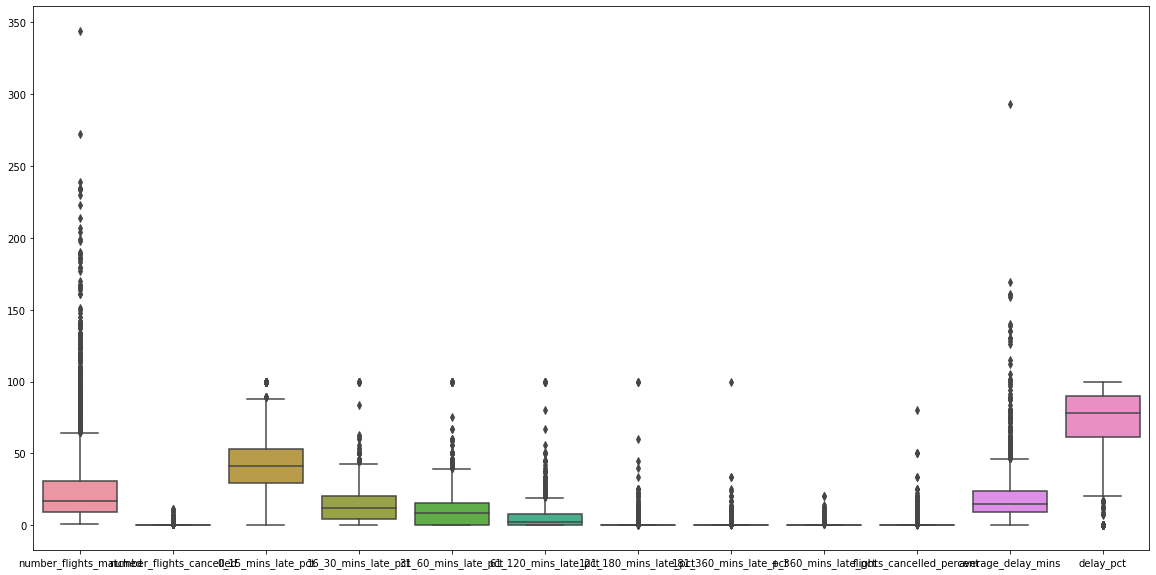

In [39]:
fig,ax=plt.subplots(figsize=(20,10))
fig = sns.boxplot(data=june_updated)
fig

**Observation :**<br>
* There are a lot of outliers in the data <br>
* The most are in number of flights <br>
* We have some outliers below lower bound of delay_pct <br>
* There are many outliers in no of flights delayed <br>

**Checking for Outliers in Number_Flights_Matched**

In [40]:
Q1_june = june_updated['number_flights_matched'].quantile(0.25)
Q3_june = june_updated['number_flights_matched'].quantile(0.75)
IQR = Q3_june - Q1_june
Upper_bound = (Q3_june)+(1.5*IQR)

In [41]:
june_updated[june_updated['number_flights_matched']>Upper_bound].sort_values(by='number_flights_matched',ascending=False).head(20)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct
3351,14/06/2022 17:02,HEATHROW,IRISH REPUBLIC,DUBLIN,AER LINGUS,D,S,344,4,35.057471,10.344828,2.586207,0.574713,0.287356,0.000000,0.0,1.149425,6.0,48.850575
3311,14/06/2022 17:02,HEATHROW,GERMANY,FRANKFURT MAIN,LUFTHANSA,D,S,272,7,51.254480,16.845878,10.752688,4.301075,0.000000,0.000000,0.0,2.508961,16.0,83.154121
4095,14/06/2022 17:02,STANSTED,IRISH REPUBLIC,DUBLIN,RYANAIR,D,S,239,0,30.962343,8.368201,14.644351,2.510460,1.255230,0.000000,0.0,0.000000,14.0,57.740585
3431,14/06/2022 17:02,HEATHROW,SPAIN,MADRID,IBERIA,D,S,235,1,42.796610,15.677966,8.050847,2.542373,0.000000,0.000000,0.0,0.423729,11.0,69.067796
3401,14/06/2022 17:02,HEATHROW,NETHERLANDS,AMSTERDAM,KLM,D,S,234,0,35.042735,14.102564,17.948718,11.111111,2.136752,1.282051,0.0,0.000000,29.0,81.623931
3111,14/06/2022 17:02,HEATHROW,UNITED KINGDOM,EDINBURGH,BRITISH AIRWAYS PLC,D,S,233,4,31.223629,24.050633,24.050633,7.594937,1.265823,0.000000,0.0,1.687764,25.0,88.185655
1242,14/06/2022 17:02,EDINBURGH,UNITED KINGDOM,HEATHROW,BRITISH AIRWAYS PLC,D,S,230,4,30.769231,20.085470,17.094017,4.273504,0.854701,0.427350,0.0,1.709402,19.0,73.504273
2533,14/06/2022 17:02,GATWICK,IRISH REPUBLIC,DUBLIN,RYANAIR,D,S,223,0,30.941704,19.730942,12.556054,5.381166,1.793722,0.000000,0.0,0.000000,18.0,70.403588
3113,14/06/2022 17:02,HEATHROW,UNITED KINGDOM,GLASGOW,BRITISH AIRWAYS PLC,D,S,214,6,40.000000,20.454545,16.818182,6.818182,1.818182,0.000000,0.0,2.727273,23.0,85.909091
1624,14/06/2022 17:02,GLASGOW,UNITED KINGDOM,HEATHROW,BRITISH AIRWAYS PLC,D,S,207,6,35.680751,11.737089,8.450704,4.694836,0.469484,0.000000,0.0,2.816901,12.0,61.032864


**Observation :**<br>
* These are outliers but are realistic and possible values <br>
* Possibility is verified by research on the internet

**Checking for Outliers in average_delay_mins**

In [42]:
Q1_june = june_updated['average_delay_mins'].quantile(0.25)
Q3_june = june_updated['average_delay_mins'].quantile(0.75)
IQR = Q3_june - Q1_june
Upper_bound = (Q3_june)+(1.5*IQR)

In [43]:
june_updated[june_updated['average_delay_mins']>Upper_bound].sort_values(by='average_delay_mins',ascending=False).head(5)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct
2925,14/06/2022 17:02,HEATHROW,BRUNEI,BANDAR SERI BEGAWAN,ROYAL BRUNEI AIRLINES,D,S,1,0,0.000000,0.000000,0.000000,0.000000,0.0,100.0,0.000000,0.0,293.0,100.000000
2555,14/06/2022 17:02,GATWICK,ITALY,CATANIA (FONTANAROSSA),WIZZ AIR UK LTD,D,S,5,0,40.000000,20.000000,20.000000,0.000000,0.0,0.0,20.000000,0.0,169.0,100.000000
3362,14/06/2022 17:02,HEATHROW,ITALY,CATANIA (FONTANAROSSA),BRITISH AIRWAYS PLC,D,S,10,0,40.000000,10.000000,30.000000,0.000000,0.0,0.0,10.000000,0.0,161.0,90.000000
4655,14/06/2022 17:02,MANCHESTER,IRISH REPUBLIC,DUBLIN,RYANAIR UK LTD,D,S,5,0,0.000000,0.000000,60.000000,20.000000,0.0,0.0,20.000000,0.0,160.0,100.000000
535,14/06/2022 17:02,BIRMINGHAM,TURKEY,ANTALYA,SUNEXPRESS,D,S,12,0,8.333333,16.666667,41.666667,16.666667,0.0,0.0,8.333333,0.0,159.0,91.666667


**Observation :**<br>
* These are outliers but are realistic and possible values <br>

**Checking for Outliers in delay_pct**

In [44]:
Q1_june = june_updated['delay_pct'].quantile(0.25)
Q3_june = june_updated['delay_pct'].quantile(0.75)
IQR = Q3_june - Q1_june
Lower_bound = (Q1_june)-(1.5*IQR)

In [45]:
june_updated[june_updated['delay_pct']<Lower_bound].sort_values(by='delay_pct',ascending=False).head(20)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct
1153,14/06/2022 17:02,EAST MIDLANDS INTERNATIONAL,SPAIN(CANARY ISLANDS),ARRECIFE,RYANAIR,D,S,17,0,17.647059,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,17.647059
3081,14/06/2022 17:02,HEATHROW,MOROCCO,RABAT,ROYAL AIR MAROC,D,S,6,0,0.000000,0.000000,16.666667,0.000000,0.0,0.0,0.0,0.0,10.0,16.666667
102,14/06/2022 17:02,BELFAST CITY (GEORGE BEST),UNITED KINGDOM,LONDON CITY,BA CITYFLYER LTD,D,S,74,0,12.162162,1.351351,2.702703,0.000000,0.0,0.0,0.0,0.0,2.0,16.216216
2632,14/06/2022 17:02,GATWICK,NORWAY,STAVANGER,NORWEGIAN AIR SHUTTLE,D,S,38,0,7.894737,5.263158,2.631579,0.000000,0.0,0.0,0.0,0.0,3.0,15.789474
2147,14/06/2022 17:02,LIVERPOOL (JOHN LENNON),SPAIN,REUS,RYANAIR,D,S,8,0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,12.500000
5035,14/06/2022 17:02,NEWCASTLE,CROATIA,ZADAR,RYANAIR,D,S,8,0,0.000000,0.000000,0.000000,12.500000,0.0,0.0,0.0,0.0,10.0,12.500000
689,14/06/2022 17:02,BRISTOL,AUSTRIA,VIENNA,RYANAIR,D,S,8,0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,12.500000
1089,14/06/2022 17:02,EAST MIDLANDS INTERNATIONAL,GREECE,CHANIA,RYANAIR,D,S,8,0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,12.500000
1091,14/06/2022 17:02,EAST MIDLANDS INTERNATIONAL,GREECE,CORFU,RYANAIR,D,S,8,0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,12.500000
3963,14/06/2022 17:02,STANSTED,CROATIA,RIJEKA,RYANAIR,D,S,8,0,12.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,12.500000


In [46]:
Lower_bound

17.715950000000014

In [47]:
june_updated['delay_pct'].mean()

74.12757324492674

**Observation :**<br>
* The outliers are below the lower bound because the flights tend to delay <br>
* Hence which flights are least delayed fall in the outliers <br>

**Outliers for July**

<AxesSubplot:>

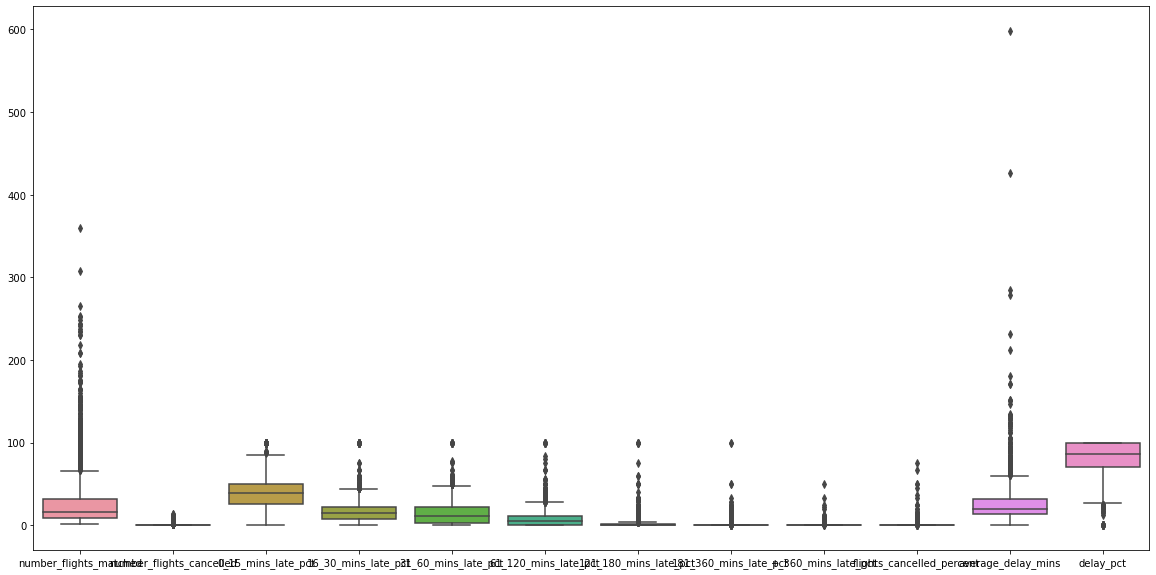

In [48]:
#July Data
fig,ax=plt.subplots(figsize=(20,10))
fig = sns.boxplot(data=july_updated)
fig

**Observation :**<br>
* The boxplot is almost the same like June <br>

**Checking for Outliers in Number_Flights_Matched**

In [49]:
Q1_july = july_updated['number_flights_matched'].quantile(0.25)
Q3_july = july_updated['number_flights_matched'].quantile(0.75)
IQR = Q3_july - Q1_july
Upper_bound = (Q3_july)+(1.5*IQR)

In [50]:
july_updated[july_updated['number_flights_matched']>Upper_bound].sort_values(by='number_flights_matched',ascending=False).head(20)

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct
4067,22/07/2022 16:26,HEATHROW,IRISH REPUBLIC,DUBLIN,AER LINGUS,D,S,360,12,33.870968,10.752688,5.913978,2.688172,1.075269,0.000000,0.000000,3.225806,11.0,54.301075
4009,22/07/2022 16:26,HEATHROW,GERMANY,FRANKFURT MAIN,LUFTHANSA,D,S,307,13,42.187500,15.937500,15.000000,3.437500,0.000000,0.000000,0.000000,4.062500,16.0,76.562500
4115,22/07/2022 16:26,HEATHROW,NETHERLANDS,AMSTERDAM,KLM,D,S,265,7,33.088235,17.279412,14.338235,8.455882,0.000000,0.735294,0.000000,2.573529,20.0,73.897058
1613,22/07/2022 16:26,EDINBURGH,UNITED KINGDOM,HEATHROW,BRITISH AIRWAYS PLC,D,S,253,0,32.806324,21.739130,19.762846,6.324111,0.395257,0.000000,0.000000,0.000000,21.0,81.027668
3796,22/07/2022 16:26,HEATHROW,UNITED KINGDOM,EDINBURGH,BRITISH AIRWAYS PLC,D,S,252,3,38.823529,27.450980,14.509804,7.450980,0.000000,0.000000,0.000000,1.176471,21.0,88.235293
4866,22/07/2022 16:26,STANSTED,IRISH REPUBLIC,DUBLIN,RYANAIR,D,S,248,0,36.693548,9.274194,8.467742,6.048387,1.209677,0.000000,0.000000,0.000000,15.0,61.693548
4149,22/07/2022 16:26,HEATHROW,SPAIN,MADRID,IBERIA,D,S,243,5,44.354839,13.306452,8.467742,2.419355,0.403226,1.209677,0.000000,2.016129,14.0,70.161291
4021,22/07/2022 16:26,HEATHROW,GERMANY,MUNICH,LUFTHANSA,D,S,243,3,46.747967,21.138211,12.195122,5.284553,1.219512,0.000000,0.000000,1.219512,20.0,86.585365
3798,22/07/2022 16:26,HEATHROW,UNITED KINGDOM,GLASGOW,BRITISH AIRWAYS PLC,D,S,241,5,40.243902,21.544715,15.040650,8.130081,0.000000,0.000000,0.000000,2.032520,21.0,84.959348
2060,22/07/2022 16:26,GLASGOW,UNITED KINGDOM,HEATHROW,BRITISH AIRWAYS PLC,D,S,238,2,41.666667,16.666667,11.250000,4.166667,0.416667,0.000000,0.000000,0.833333,15.0,74.166668


**Observation :**<br>
* These are outliers but are realistic and possible values <br>
* Possibility is verified by research on the internet

**There are a lot of outliers but I would not remove those because of the following reasons** <br>
1. We don't have to use the data for machine learning <br>
2. Data is from UK CAA a very authentic source.<br>
3. Data is of all the airport in the UK with all the route and flight records hence a very large data.<br>
4. I checked in the above code what the outliers are and all seem to be a real case scenario.<br>
5. We know by media that there have been unprecedented delays and canecllations this summer in the UK <br>
6. So the values should be acceptable.


In [51]:
june_updated.mean()

C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/1453347511.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  june_updated.mean()


number_flights_matched       29.742803
number_flights_cancelled      0.317131
0_15_mins_late_pct           41.756849
16_30_mins_late_pct          13.542426
31_60_mins_late_pct          11.111951
61_120_mins_late_pct          5.652907
121_180_mins_late_pct         1.345331
181_360_mins_late_pct         0.622141
+_360_mins_late_pct           0.095970
flights_cancelled_percent     0.858735
average_delay_mins           19.253893
delay_pct                    74.127573
dtype: float64

**Observation :**<br>
We need number of flights delayed on a route <br>
so following code will do it for us

In [52]:
june_updated['no_flight_delayed']= (june_updated['number_flights_matched'] * june_updated['delay_pct']) /100
july_updated['no_flight_delayed']= (july_updated['number_flights_matched'] * july_updated['delay_pct']) /100

C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3316553334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_updated['no_flight_delayed']= (june_updated['number_flights_matched'] * june_updated['delay_pct']) /100
C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3316553334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_updated['no_flight_delayed']= (july_updated['number_flights_matched'] * july_updated['delay_pct']) /100


In [53]:
june_updated['no_flight_delayed']= june_updated['no_flight_delayed'].astype(int)
july_updated['no_flight_delayed']= july_updated['no_flight_delayed'].astype(int)

C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3784170138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june_updated['no_flight_delayed']= june_updated['no_flight_delayed'].astype(int)
C:\Users\Hamza\AppData\Local\Temp/ipykernel_16544/3784170138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july_updated['no_flight_delayed']= july_updated['no_flight_delayed'].astype(int)


In [54]:
june_updated.reset_index(inplace=True)

In [55]:
june_updated= june_updated.drop(columns=['index'])

In [56]:
july_updated.reset_index(inplace=True)
july_updated= july_updated.drop(columns=['index'])

**Final Datasets for analysis**
* Below is the info for datasets which will be further used for analysis and visualization


**Data Info**

In [57]:
june_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   run_date                    2119 non-null   object 
 1   reporting_airport           2119 non-null   object 
 2   origin_destination_country  2119 non-null   object 
 3   origin_destination          2119 non-null   object 
 4   airline_name                2119 non-null   object 
 5   arrival_departure           2119 non-null   object 
 6   scheduled_charter           2119 non-null   object 
 7   number_flights_matched      2119 non-null   int64  
 8   number_flights_cancelled    2119 non-null   int64  
 9   0_15_mins_late_pct          2119 non-null   float64
 10  16_30_mins_late_pct         2119 non-null   float64
 11  31_60_mins_late_pct         2119 non-null   float64
 12  61_120_mins_late_pct        2119 non-null   float64
 13  121_180_mins_late_pct       2119 

**Observation :**<br>
* We have 20 columns in the dataframe <br>
* We have 7 categorical features <br>
* We have 13 Numerical Features <br>
* There are no null values in any of the columns <br>

In [58]:
july_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   run_date                    2420 non-null   object 
 1   reporting_airport           2420 non-null   object 
 2   origin_destination_country  2420 non-null   object 
 3   origin_destination          2420 non-null   object 
 4   airline_name                2420 non-null   object 
 5   arrival_departure           2420 non-null   object 
 6   scheduled_charter           2420 non-null   object 
 7   number_flights_matched      2420 non-null   int64  
 8   number_flights_cancelled    2420 non-null   int64  
 9   0_15_mins_late_pct          2420 non-null   float64
 10  16_30_mins_late_pct         2420 non-null   float64
 11  31_60_mins_late_pct         2420 non-null   float64
 12  61_120_mins_late_pct        2420 non-null   float64
 13  121_180_mins_late_pct       2420 

**Observation :**<br>
* We have 20 columns in the dataframe <br>
* We have 7 categorical features <br>
* We have 13 Numerical Features <br>
* There are no null values in any of the columns <br>

# Visualizaiton

## Univariate Analysis

In [59]:
delayed_pct_df = pd.concat([june_updated['delay_pct'],july_updated['delay_pct']],axis=1)
delayed_pct_df.rename(columns={0:'june',1:'july'},inplace=True)


In [60]:
delayed_pct_df.columns=['june','july']

In [61]:
delayed_pct_df.describe()

,june,july
count,2119.000000,2420.000000
mean,74.127573,80.852494
std,21.750771,19.385217
min,0.000000,0.000000
25%,61.086380,70.212766
50%,77.777777,85.714286
75%,90.000000,99.999999
max,100.000001,100.000002


<AxesSubplot:title={'center':'Number of Flights Delayed Percentage by Month'}, xlabel='Month', ylabel='Delayed Percentage'>

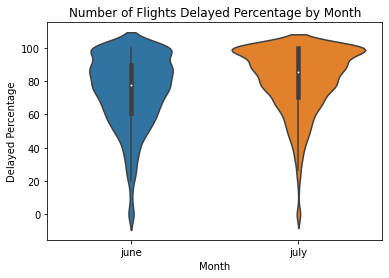

In [62]:
fig=plt.subplots()
fig = sns.violinplot(data=delayed_pct_df)
fig.set_xlabel('Month')
fig.set_ylabel('Delayed Percentage')
fig.set_title('Number of Flights Delayed Percentage by Month')
fig

**Observation :**<br>
* Median of July is higher than June <br>
* There is more data for July comparitively to June <br>
* For July there are more chances for a flight to get delayed because the Quantiles are greater than June's Quantiles <br>
* Hence we can see that July is the more busy than June <br>

In [63]:
june_updated.dtypes

run_date                       object
reporting_airport              object
origin_destination_country     object
origin_destination             object
airline_name                   object
arrival_departure              object
scheduled_charter              object
number_flights_matched          int64
number_flights_cancelled        int64
0_15_mins_late_pct            float64
16_30_mins_late_pct           float64
31_60_mins_late_pct           float64
61_120_mins_late_pct          float64
121_180_mins_late_pct         float64
181_360_mins_late_pct         float64
+_360_mins_late_pct           float64
flights_cancelled_percent     float64
average_delay_mins            float64
delay_pct                     float64
no_flight_delayed               int32
dtype: object

In [64]:
average_delay_mins_month.describe().transpose()['mean'].plot(kind='bar',xlabel='Months',ylabel='Average Delay in Minutes',title='Average Delay in Minutes by Month',figsize=(3,3))

NameError: name 'average_delay_mins_month' is not defined

## MultiVariate Analysis

**Creating Dataset for Airlines in relation to Numerical Data**

In [78]:
june_flight_delayed_df = june_updated.groupby('airline_name').sum()[['number_flights_matched','no_flight_delayed','number_flights_cancelled']].sort_values(by='number_flights_matched',ascending=False).head(15)

In [79]:
july_flight_delayed_df = july_updated.groupby('airline_name').sum()[['number_flights_matched','no_flight_delayed','number_flights_cancelled']].sort_values(by='number_flights_matched',ascending=False).head(15)

In [81]:
july_flight_delayed_df.head()

,number_flights_matched,no_flight_delayed,number_flights_cancelled
airline_name,,,
EASYJET UK LTD,14810,11389,305
RYANAIR,12317,8859,7
BRITISH AIRWAYS PLC,10686,8791,91
JET2.COM LTD,4889,4263,5
LOGANAIR LTD,2948,2100,87


In [82]:
june_flight_delayed_df.reset_index(inplace=True)
july_flight_delayed_df.reset_index(inplace=True)


In [83]:
june_flight_delayed_df.columns=['airline_name','number_flights_matched','no_flight_delayed','number_flights_cancelled']

july_flight_delayed_df.columns=['airline_name','number_flights_matched','no_flight_delayed','number_flights_cancelled']



In [85]:
june_flight_delayed_df['delay_pct']= june_flight_delayed_df['no_flight_delayed']*100/june_flight_delayed_df['number_flights_matched']
july_flight_delayed_df['delay_pct']= july_flight_delayed_df['no_flight_delayed']*100/july_flight_delayed_df['number_flights_matched']

june_flight_delayed_df['cancel_pct']= june_flight_delayed_df['number_flights_cancelled']*100/june_flight_delayed_df['number_flights_matched']
july_flight_delayed_df['cancel_pct']= july_flight_delayed_df['number_flights_cancelled']*100/july_flight_delayed_df['number_flights_matched']

In [86]:
june_flight_delayed_df.head().sort_values(by='cancel_pct',ascending=False)

,airline_name,number_flights_matched,no_flight_delayed,number_flights_cancelled,delay_pct,cancel_pct
4,LOGANAIR LTD,2729,1776,84,65.078783,3.078051
2,BRITISH AIRWAYS PLC,9888,8009,209,80.997168,2.113673
0,EASYJET UK LTD,13433,9088,148,67.654284,1.101764
1,RYANAIR,11606,8039,4,69.265897,0.034465
3,JET2.COM LTD,3216,2251,1,69.993781,0.031095


In [87]:
july_flight_delayed_df.head().sort_values(by='cancel_pct',ascending=False)

,airline_name,number_flights_matched,no_flight_delayed,number_flights_cancelled,delay_pct,cancel_pct
4,LOGANAIR LTD,2948,2100,87,71.234735,2.951153
0,EASYJET UK LTD,14810,11389,305,76.900743,2.059419
2,BRITISH AIRWAYS PLC,10686,8791,91,82.266517,0.851582
3,JET2.COM LTD,4889,4263,5,87.195746,0.102270
1,RYANAIR,12317,8859,7,71.924982,0.056832


**Database Creation Complete**

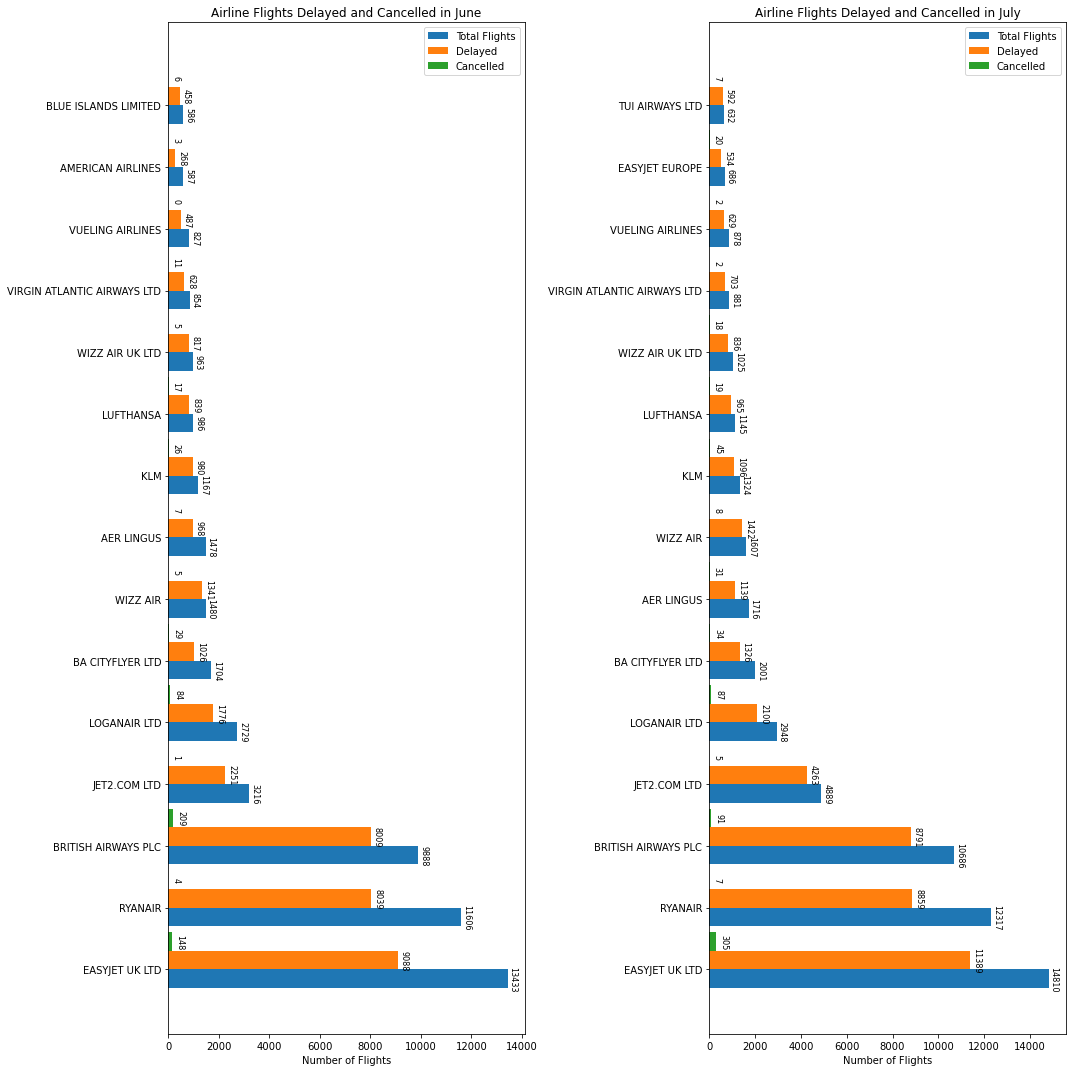

In [88]:
labels = june_flight_delayed_df['airline_name']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
rects1 = ax[0].barh(x - width/2, june_flight_delayed_df['number_flights_matched'], width, label='Total Flights')
rects2 = ax[0].barh(x + width/2, june_flight_delayed_df['no_flight_delayed'], width, label='Delayed')
rects3 = ax[0].barh(x + width*1.5, june_flight_delayed_df['number_flights_cancelled'], width, label='Cancelled')
ax[0].set_xlabel('Number of Flights')
ax[0].set_title('Airline Flights Delayed and Cancelled in June')
ax[0].legend()
ax[0].bar_label(rects1, padding=1, fontsize=8, color='black', rotation=270)
ax[0].bar_label(rects2, padding=2, fontsize=8, color='black', rotation=270)
ax[0].bar_label(rects3,padding=3, fontsize=8, color='black', rotation=270)
ax[0].set_yticks(x[::1])
ax[0].set_yticklabels(labels)
fig.tight_layout()
###########################
labels = july_flight_delayed_df['airline_name']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
rects1 = ax[1].barh(x - width/2, july_flight_delayed_df['number_flights_matched'], width, label='Total Flights')
rects2 = ax[1].barh(x + width/2, july_flight_delayed_df['no_flight_delayed'], width, label='Delayed')
rects3 = ax[1].barh(x + width*1.5, july_flight_delayed_df['number_flights_cancelled'], width, label='Cancelled')
ax[1].set_xlabel('Number of Flights')
ax[1].set_title('Airline Flights Delayed and Cancelled in July')
ax[1].legend()
ax[1].bar_label(rects1, padding=1, fontsize=8, color='black', rotation=270)
ax[1].bar_label(rects2, padding=2, fontsize=8, color='black', rotation=270)
ax[1].bar_label(rects3, padding=3, fontsize=8, color='black', rotation=270)
ax[1].set_yticks(x[::1])
ax[1].set_yticklabels(labels)
fig.tight_layout()

plt.show()

**Observation :**<br>
* EasyJet is the most popular airline in the UK followed by RyanAir and British Airways<br>


In [89]:
june_flight_delayed_df.sort_values(by='delay_pct',ascending=False)

,airline_name,number_flights_matched,no_flight_delayed,number_flights_cancelled,delay_pct,cancel_pct
6,WIZZ AIR,1480,1341,5,90.608108,0.337838
9,LUFTHANSA,986,839,17,85.091278,1.724138
10,WIZZ AIR UK LTD,963,817,5,84.839045,0.519211
8,KLM,1167,980,26,83.976007,2.227935
2,BRITISH AIRWAYS PLC,9888,8009,209,80.997168,2.113673
14,BLUE ISLANDS LIMITED,586,458,6,78.156997,1.023891
11,VIRGIN ATLANTIC AIRWAYS LTD,854,628,11,73.536300,1.288056
3,JET2.COM LTD,3216,2251,1,69.993781,0.031095
1,RYANAIR,11606,8039,4,69.265897,0.034465
0,EASYJET UK LTD,13433,9088,148,67.654284,1.101764


In [90]:
june_flight_delayed_df.sort_values(by='cancel_pct',ascending=False)

,airline_name,number_flights_matched,no_flight_delayed,number_flights_cancelled,delay_pct,cancel_pct
4,LOGANAIR LTD,2729,1776,84,65.078783,3.078051
8,KLM,1167,980,26,83.976007,2.227935
2,BRITISH AIRWAYS PLC,9888,8009,209,80.997168,2.113673
9,LUFTHANSA,986,839,17,85.091278,1.724138
5,BA CITYFLYER LTD,1704,1026,29,60.211268,1.701878
11,VIRGIN ATLANTIC AIRWAYS LTD,854,628,11,73.536300,1.288056
0,EASYJET UK LTD,13433,9088,148,67.654284,1.101764
14,BLUE ISLANDS LIMITED,586,458,6,78.156997,1.023891
10,WIZZ AIR UK LTD,963,817,5,84.839045,0.519211
13,AMERICAN AIRLINES,587,268,3,45.655877,0.511073


In [91]:
june_flight_delayed_df=june_flight_delayed_df.round(2)
july_flight_delayed_df=july_flight_delayed_df.round(2)

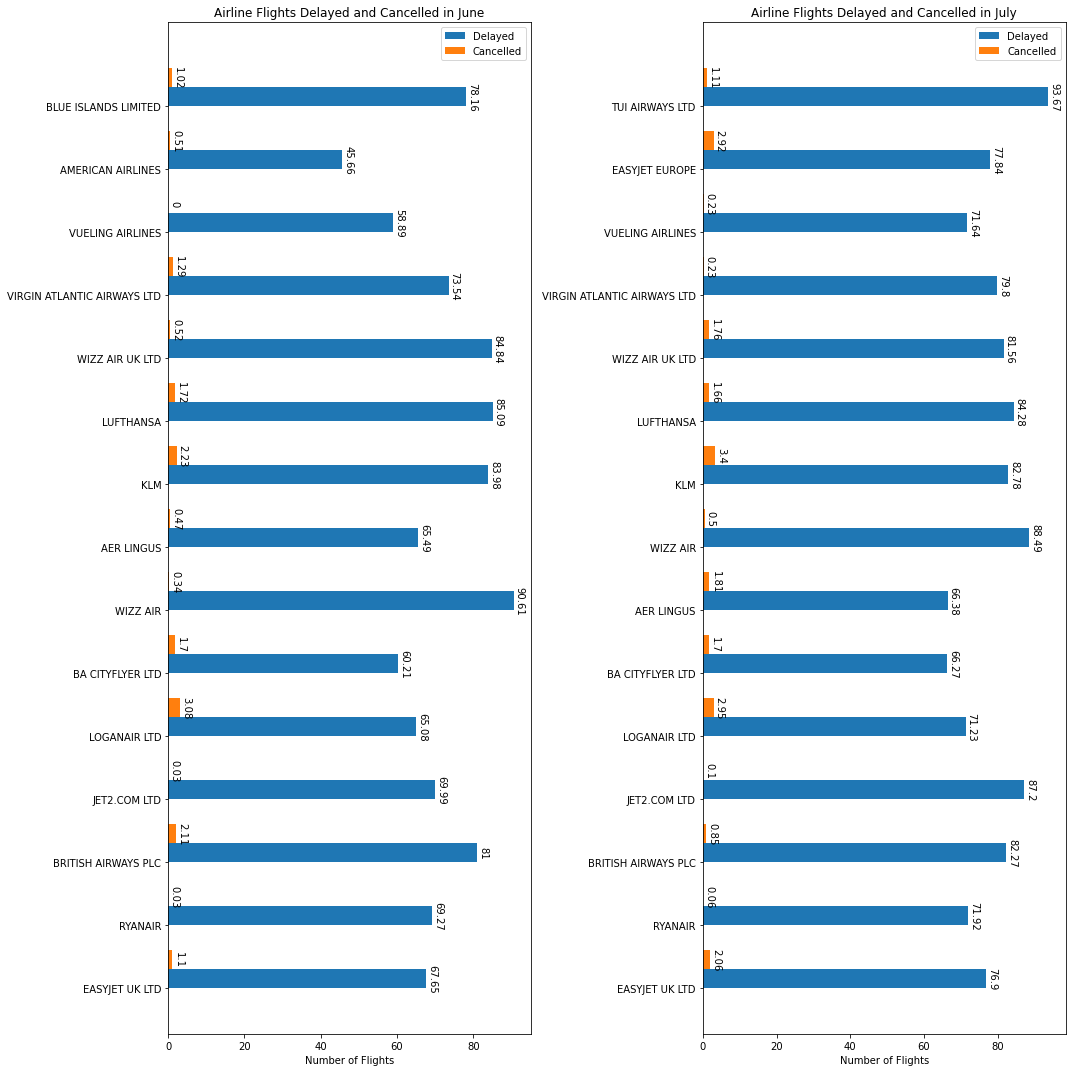

In [92]:
labels = june_flight_delayed_df['airline_name']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(15,15))
rects2 = ax[0].barh(x + width/2, june_flight_delayed_df['delay_pct'], width, label='Delayed')
rects3 = ax[0].barh(x + width*1.5, june_flight_delayed_df['cancel_pct'], width, label='Cancelled')
ax[0].set_xlabel('Number of Flights')
ax[0].set_title('Airline Flights Delayed and Cancelled in June')
ax[0].legend()
ax[0].bar_label(rects1, padding=1, fontsize=10, color='black', rotation=270)
ax[0].bar_label(rects2, padding=1, fontsize=10, color='black', rotation=270)
ax[0].bar_label(rects3,padding=1, fontsize=10, color='black', rotation=270)
ax[0].set_yticks(x[::1])
ax[0].set_yticklabels(labels)
fig.tight_layout()
###############################
labels = july_flight_delayed_df['airline_name']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
rects2 = ax[1].barh(x + width/2, july_flight_delayed_df['delay_pct'], width, label='Delayed')
rects3 = ax[1].barh(x + width*1.5, july_flight_delayed_df['cancel_pct'], width, label='Cancelled')
ax[1].set_xlabel('Number of Flights')
ax[1].set_title('Airline Flights Delayed and Cancelled in July')
ax[1].legend()
ax[1].bar_label(rects1, padding=1, fontsize=10, color='black', rotation=270)
ax[1].bar_label(rects2, padding=1, fontsize=10, color='black', rotation=270)
ax[1].bar_label(rects3,padding=1, fontsize=10, color='black', rotation=270)
ax[1].set_yticks(x[::1])
ax[1].set_yticklabels(labels)
fig.tight_layout()

**Observation :**<br>
* Wizz air had the highest percentage of flights delayed in June <br>
* Surprisingly followed by Lufthansa at 85% of the flights delayed in June  <br>
* EasyJet the most popular airline has 67.65% of the flights delayed in June <br>
* RyanAir stood at 69.27% <br>
* British Airways was slightly more than 80 at 81% of the flights delayed in June <br>
* TUI Airways had the highest delay percentage of flights in July at 93% whereas Wizz Air had only 90% <br>
* EasyJet's Flight delay percentage increased by almost 10% in July <br>
* RyanAir's Flight delay percentage increased by about 2%<br>
* Highest Change was observed in Jet2 which increased by 17% in July <br>
* Most cancellations were observed in Logan Air in June whihc was replaced by KLM in July <br>


In [93]:
july_flight_delayed_df.head()

,airline_name,number_flights_matched,no_flight_delayed,number_flights_cancelled,delay_pct,cancel_pct
0,EASYJET UK LTD,14810,11389,305,76.90,2.06
1,RYANAIR,12317,8859,7,71.92,0.06
2,BRITISH AIRWAYS PLC,10686,8791,91,82.27,0.85
3,JET2.COM LTD,4889,4263,5,87.20,0.10
4,LOGANAIR LTD,2948,2100,87,71.23,2.95


In [94]:
july_flight_delayed_df = july_updated.groupby('airline_name').sum()[['number_flights_matched','no_flight_delayed','number_flights_cancelled']].sort_values(by='number_flights_matched',ascending=False).head(15)
july_flight_delayed_df.reset_index(inplace=True)
july_flight_delayed_df.columns=['airline_name','number_flights_matched','no_flight_delayed','number_flights_cancelled']


In [95]:
june_updated.sort_values(by='number_flights_matched',ascending=False).head(5) # Tells us the top 5 busiest routes in June

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct,no_flight_delayed
1303,14/06/2022 17:02,HEATHROW,IRISH REPUBLIC,DUBLIN,AER LINGUS,D,S,344,4,35.057471,10.344828,2.586207,0.574713,0.287356,0.000000,0.0,1.149425,6.0,48.850575,168
1283,14/06/2022 17:02,HEATHROW,GERMANY,FRANKFURT MAIN,LUFTHANSA,D,S,272,7,51.254480,16.845878,10.752688,4.301075,0.000000,0.000000,0.0,2.508961,16.0,83.154121,226
1640,14/06/2022 17:02,STANSTED,IRISH REPUBLIC,DUBLIN,RYANAIR,D,S,239,0,30.962343,8.368201,14.644351,2.510460,1.255230,0.000000,0.0,0.000000,14.0,57.740585,137
1338,14/06/2022 17:02,HEATHROW,SPAIN,MADRID,IBERIA,D,S,235,1,42.796610,15.677966,8.050847,2.542373,0.000000,0.000000,0.0,0.423729,11.0,69.067796,162
1323,14/06/2022 17:02,HEATHROW,NETHERLANDS,AMSTERDAM,KLM,D,S,234,0,35.042735,14.102564,17.948718,11.111111,2.136752,1.282051,0.0,0.000000,29.0,81.623931,190


In [96]:
july_updated.sort_values(by='number_flights_matched',ascending=False).head(5) # Tells us the top 5 busiest routes in July

,run_date,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,number_flights_cancelled,0_15_mins_late_pct,16_30_mins_late_pct,31_60_mins_late_pct,61_120_mins_late_pct,121_180_mins_late_pct,181_360_mins_late_pct,+_360_mins_late_pct,flights_cancelled_percent,average_delay_mins,delay_pct,no_flight_delayed
1510,22/07/2022 16:26,HEATHROW,IRISH REPUBLIC,DUBLIN,AER LINGUS,D,S,360,12,33.870968,10.752688,5.913978,2.688172,1.075269,0.000000,0.0,3.225806,11.0,54.301075,195
1482,22/07/2022 16:26,HEATHROW,GERMANY,FRANKFURT MAIN,LUFTHANSA,D,S,307,13,42.187500,15.937500,15.000000,3.437500,0.000000,0.000000,0.0,4.062500,16.0,76.562500,235
1531,22/07/2022 16:26,HEATHROW,NETHERLANDS,AMSTERDAM,KLM,D,S,265,7,33.088235,17.279412,14.338235,8.455882,0.000000,0.735294,0.0,2.573529,20.0,73.897058,195
555,22/07/2022 16:26,EDINBURGH,UNITED KINGDOM,HEATHROW,BRITISH AIRWAYS PLC,D,S,253,0,32.806324,21.739130,19.762846,6.324111,0.395257,0.000000,0.0,0.000000,21.0,81.027668,205
1380,22/07/2022 16:26,HEATHROW,UNITED KINGDOM,EDINBURGH,BRITISH AIRWAYS PLC,D,S,252,3,38.823529,27.450980,14.509804,7.450980,0.000000,0.000000,0.0,1.176471,21.0,88.235293,222


In [97]:
average_delay_mins_month = pd.concat([june_updated['average_delay_mins'],july_updated['average_delay_mins']],axis=1)
average_delay_mins_month.rename(columns={0:'june',1:'july'},inplace=True)
average_delay_mins_month.columns=['june','july']
#Average Delay in Minutes by Month

# Group By Airport and their Statistics 

## June

In [98]:
airport_flights_df_june = june_updated.groupby('reporting_airport').sum()[['number_flights_matched','no_flight_delayed','number_flights_cancelled']].sort_values(by='no_flight_delayed',ascending=False)
airport_flights_df_june.reset_index(inplace=True)
airport_flights_df_june.columns=['reporting_airport','number_flights_matched','no_flight_delayed','number_flights_cancelled']
airport_flights_df_june.head()

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled
0,HEATHROW,15876,11991,250
1,GATWICK,8886,6367,44
2,MANCHESTER,5839,4632,49
3,STANSTED,6478,4170,14
4,LUTON,3800,2882,19


In [99]:
airport_flights_df_june['delayed_pct'] = (airport_flights_df_june['no_flight_delayed'] * 100) / airport_flights_df_june['number_flights_matched']
airport_flights_df_june['cancled_pct'] = (airport_flights_df_june['number_flights_cancelled'] * 100) / airport_flights_df_june['number_flights_matched']

In [100]:
airport_flights_df_june.head()

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled,delayed_pct,cancled_pct
0,HEATHROW,15876,11991,250,75.529101,1.574704
1,GATWICK,8886,6367,44,71.652037,0.495161
2,MANCHESTER,5839,4632,49,79.328652,0.839185
3,STANSTED,6478,4170,14,64.371720,0.216116
4,LUTON,3800,2882,19,75.842105,0.500000


Top 5 Busiest Airport in June

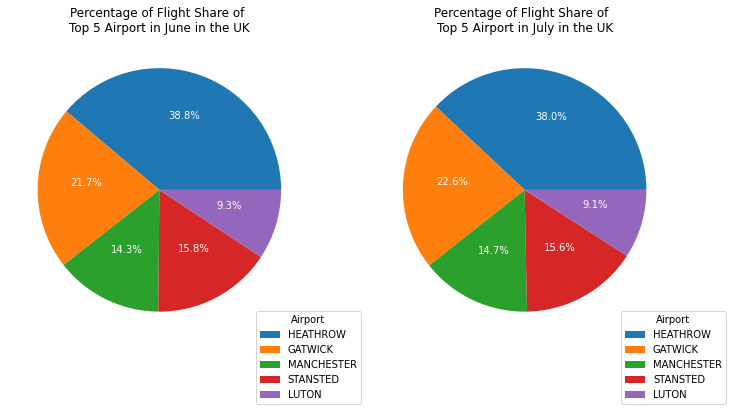

In [103]:
# plot
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,20))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n".format(pct, absolute)
labels = airport_flights_df_june['reporting_airport']
wedges, texts, autotexts = ax[0].pie(airport_flights_df_june['number_flights_matched'].head(5), autopct=lambda pct: func(pct, airport_flights_df_june['number_flights_matched']),
                                  textprops=dict(color="w"))
ax[0].legend(labels,
          title="Airport",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 1,-0.1))
ax[0].set_title('Percentage of Flight Share of \nTop 5 Airport in June in the UK')

labels = airport_flights_df_june['reporting_airport']
wedges, texts, autotexts = ax[1].pie(airport_flights_df_july['number_flights_matched'].head(5), autopct=lambda pct: func(pct, airport_flights_df_june['number_flights_matched']),
                                  textprops=dict(color="w"))
ax[1].legend(labels,
          title="Airport",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 1,-0.1))
ax[1].set_title('Percentage of Flight Share of  \nTop 5 Airport in July in the UK')

plt.show()

**Observation :**<br>
* The busiest airport in the UK in June and July was Heathrow <br>
* Almost 38% of the departures in the UK is carried by Heathrow <br>
* There is no notable difference in change between both months <br>
* 4 of the Top 5 busiest airports are in London: <br>

## July

In [102]:
airport_flights_df_july = july_updated.groupby('reporting_airport').sum()[['number_flights_matched','no_flight_delayed','number_flights_cancelled']].sort_values(by='no_flight_delayed',ascending=False)
airport_flights_df_july.reset_index(inplace=True)
airport_flights_df_july.columns=['reporting_airport','number_flights_matched','no_flight_delayed','number_flights_cancelled']
airport_flights_df_july.head(5)

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled
0,HEATHROW,17105,13268,186
1,GATWICK,10192,8312,187
2,MANCHESTER,6598,5514,86
3,STANSTED,7009,4756,10
4,LUTON,4101,3171,22


In [104]:
airport_flights_df_july['delayed_pct'] = (airport_flights_df_july['no_flight_delayed'] * 100) / airport_flights_df_july['number_flights_matched']
airport_flights_df_july['cancled_pct'] = (airport_flights_df_july['number_flights_cancelled'] * 100) / airport_flights_df_july['number_flights_matched']
airport_flights_df_july.head()

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled,delayed_pct,cancled_pct
0,HEATHROW,17105,13268,186,77.567963,1.087401
1,GATWICK,10192,8312,187,81.554160,1.834772
2,MANCHESTER,6598,5514,86,83.570779,1.303425
3,STANSTED,7009,4756,10,67.855614,0.142674
4,LUTON,4101,3171,22,77.322604,0.536455


In [ ]:
airport_flights_df_july.drop(['level_0','index'],axis=1,inplace=True)
airport_flights_df_july.head()

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled,delayed_pct,cancled_pct
0,HEATHROW,17105,13268,186,77.567963,1.087401
1,GATWICK,10192,8312,187,81.554160,1.834772
2,MANCHESTER,6598,5514,86,83.570779,1.303425
3,STANSTED,7009,4756,10,67.855614,0.142674
4,LUTON,4101,3171,22,77.322604,0.536455


# Delay on Airport in Minutes in June and July

<AxesSubplot:title={'center':'Average Delay in Minutes at an Airport'}, xlabel='average_delay_mins', ylabel='reporting_airport'>

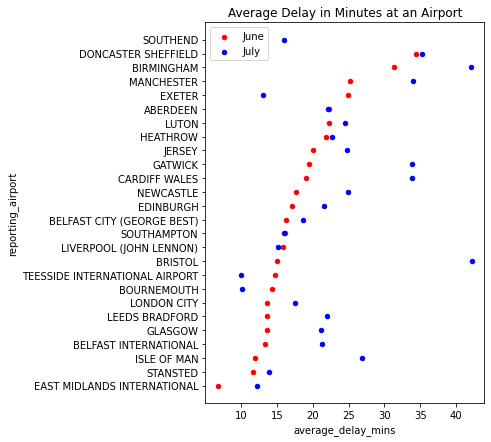

In [105]:
ax = june_updated.groupby('reporting_airport').mean()['average_delay_mins'].sort_values(ascending=True).reset_index().plot(kind='scatter',y='reporting_airport',x='average_delay_mins',figsize=(5,7),color='red',label='June', title='Average Delay in Minutes at an Airport')
july_updated.groupby('reporting_airport').mean()['average_delay_mins'].sort_values(ascending=True).reset_index().plot(kind='scatter',y='reporting_airport',x='average_delay_mins',color='blue',label='July',ax=ax)

**Observation :**<br>
* The maximum time delay in Minutes in July was at Bristol which averaged at around 45 minutes followed by Birmingham at around 40 Minutes<br>
* The maximum time delay in Minutes in June was at Doncaster Sheffield which averaged at around 35 minutes <br>
* The maximum time delay had an increase of 10 minutes in July compared to June <br>
* The minimum time delay in Minutes in July was at Teeside Internation Airport which averaged at around 10 minutes <br>
* The minimum time delay in Minutes in June was at East Midlands International which averaged at around 5 minutes <br>
* Maximum Change was seen in Gatwick and Cardiff
* Cardiff's time delay changed from about 17 minutes in June to about 35 minutes in July <br>
* Gatwick's time delay changed from about 20 minutes in June to about 35 minutes in July <br>

# Airport with Most Delayed Fights in June

In [106]:
airport_flights_df_june.head().sort_values(by='no_flight_delayed',ascending=False)

,reporting_airport,number_flights_matched,no_flight_delayed,number_flights_cancelled,delayed_pct,cancled_pct
0,HEATHROW,15876,11991,250,75.529101,1.574704
1,GATWICK,8886,6367,44,71.652037,0.495161
2,MANCHESTER,5839,4632,49,79.328652,0.839185
3,STANSTED,6478,4170,14,64.371720,0.216116
4,LUTON,3800,2882,19,75.842105,0.500000


# Airport with Most Delayed Fights in June and July

In [107]:
%matplotlib inline

In [108]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

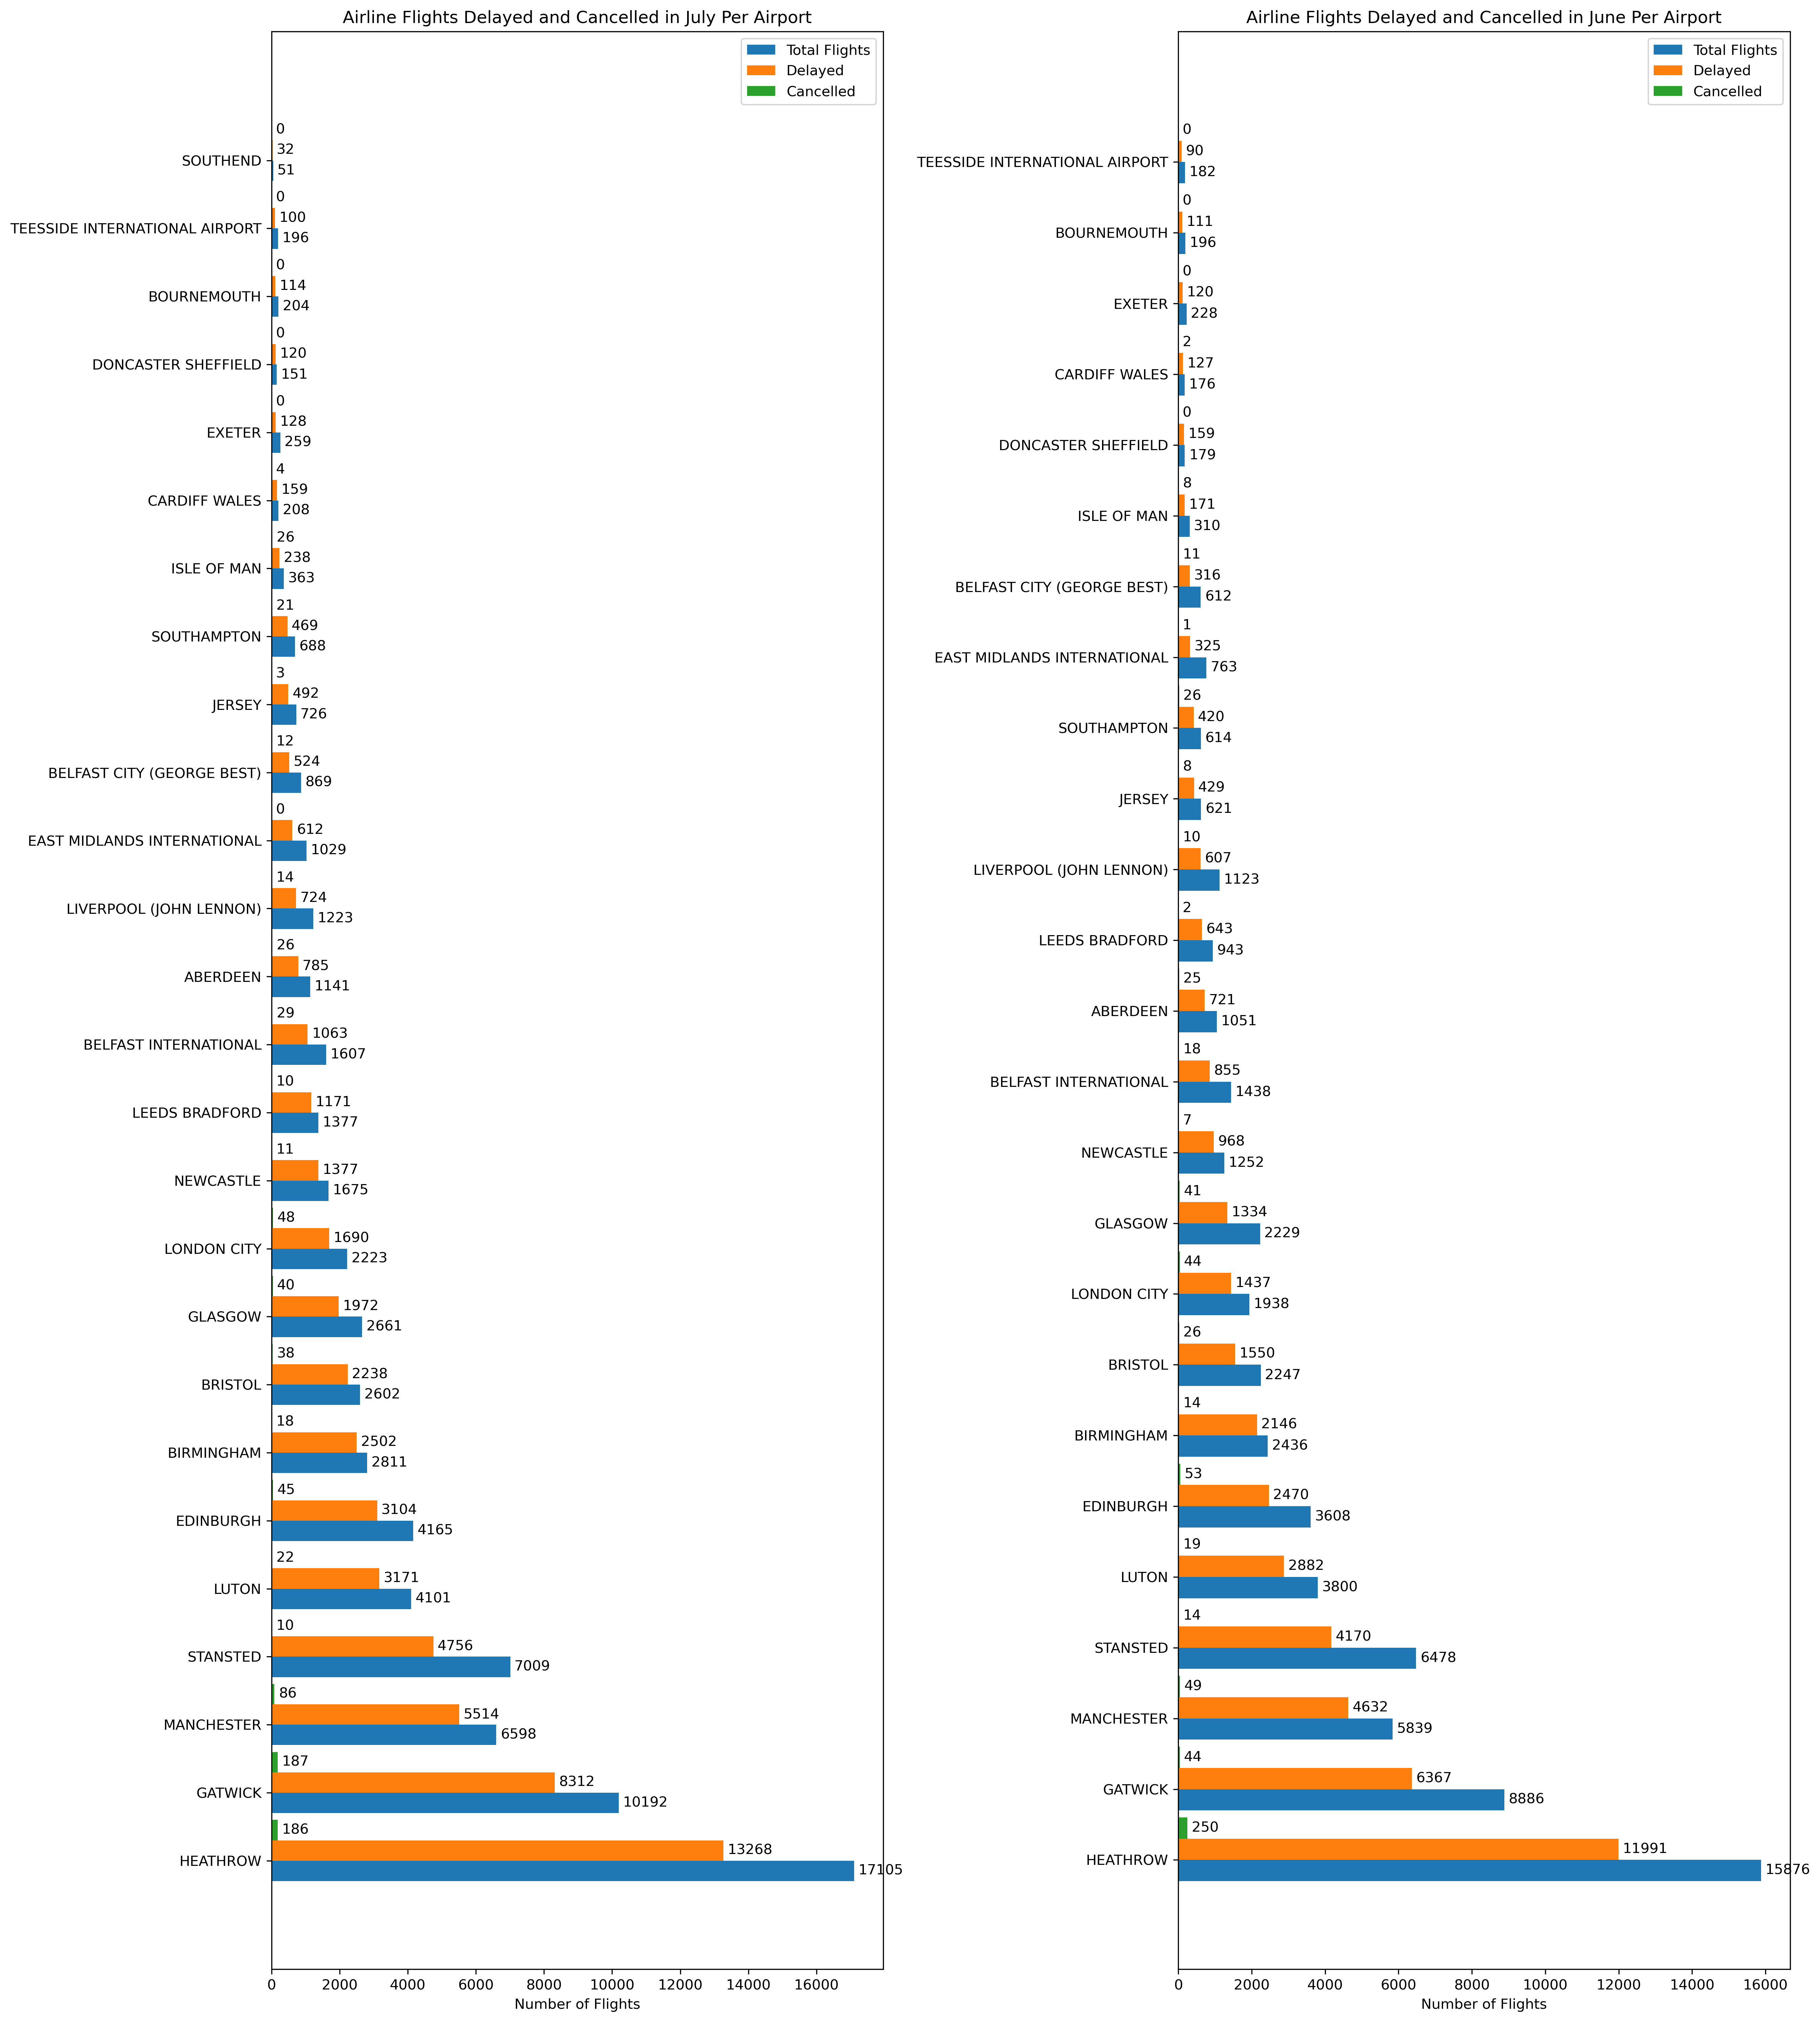

In [109]:
labels = airport_flights_df_july['reporting_airport']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,20))
rects1 = ax[0].barh(x - width/2, airport_flights_df_july['number_flights_matched'], width, label='Total Flights')
rects2 = ax[0].barh(x + width/2, airport_flights_df_july['no_flight_delayed'], width, label='Delayed')
rects3 = ax[0].barh(x + width*1.5, airport_flights_df_july['number_flights_cancelled'], width, label='Cancelled')
ax[0].set_xlabel('Number of Flights')
ax[0].set_title('Airline Flights Delayed and Cancelled in July Per Airport')
ax[0].legend()
ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)
ax[0].bar_label(rects3, padding=3)
ax[0].set_yticks(x[::1])
ax[0].set_yticklabels(labels)

########################################
labels = airport_flights_df_june['reporting_airport']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
rects1 = ax[1].barh(x - width/2, airport_flights_df_june['number_flights_matched'], width, label='Total Flights')
rects2 = ax[1].barh(x + width/2, airport_flights_df_june['no_flight_delayed'], width, label='Delayed')
rects3 = ax[1].barh(x + width*1.5, airport_flights_df_june['number_flights_cancelled'], width, label='Cancelled')
ax[1].set_xlabel('Number of Flights')
ax[1].set_title('Airline Flights Delayed and Cancelled in June Per Airport')
ax[1].legend()
ax[1].bar_label(rects1, padding=3)
ax[1].bar_label(rects2, padding=3)
ax[1].bar_label(rects3, padding=3)
ax[1].set_yticks(x[::1])
ax[1].set_yticklabels(labels)
fig.tight_layout()


plt.show()

In [110]:
plt.savefig('airport_flights_delayed_cancelled.png')

<Figure size 1800x1200 with 0 Axes>

Percentage of flights delayed on a route in June and July

<AxesSubplot:title={'center':'Percentage of Number of Flights Delayed at an Airport in the UK'}, xlabel='delayed_pct', ylabel='reporting_airport'>

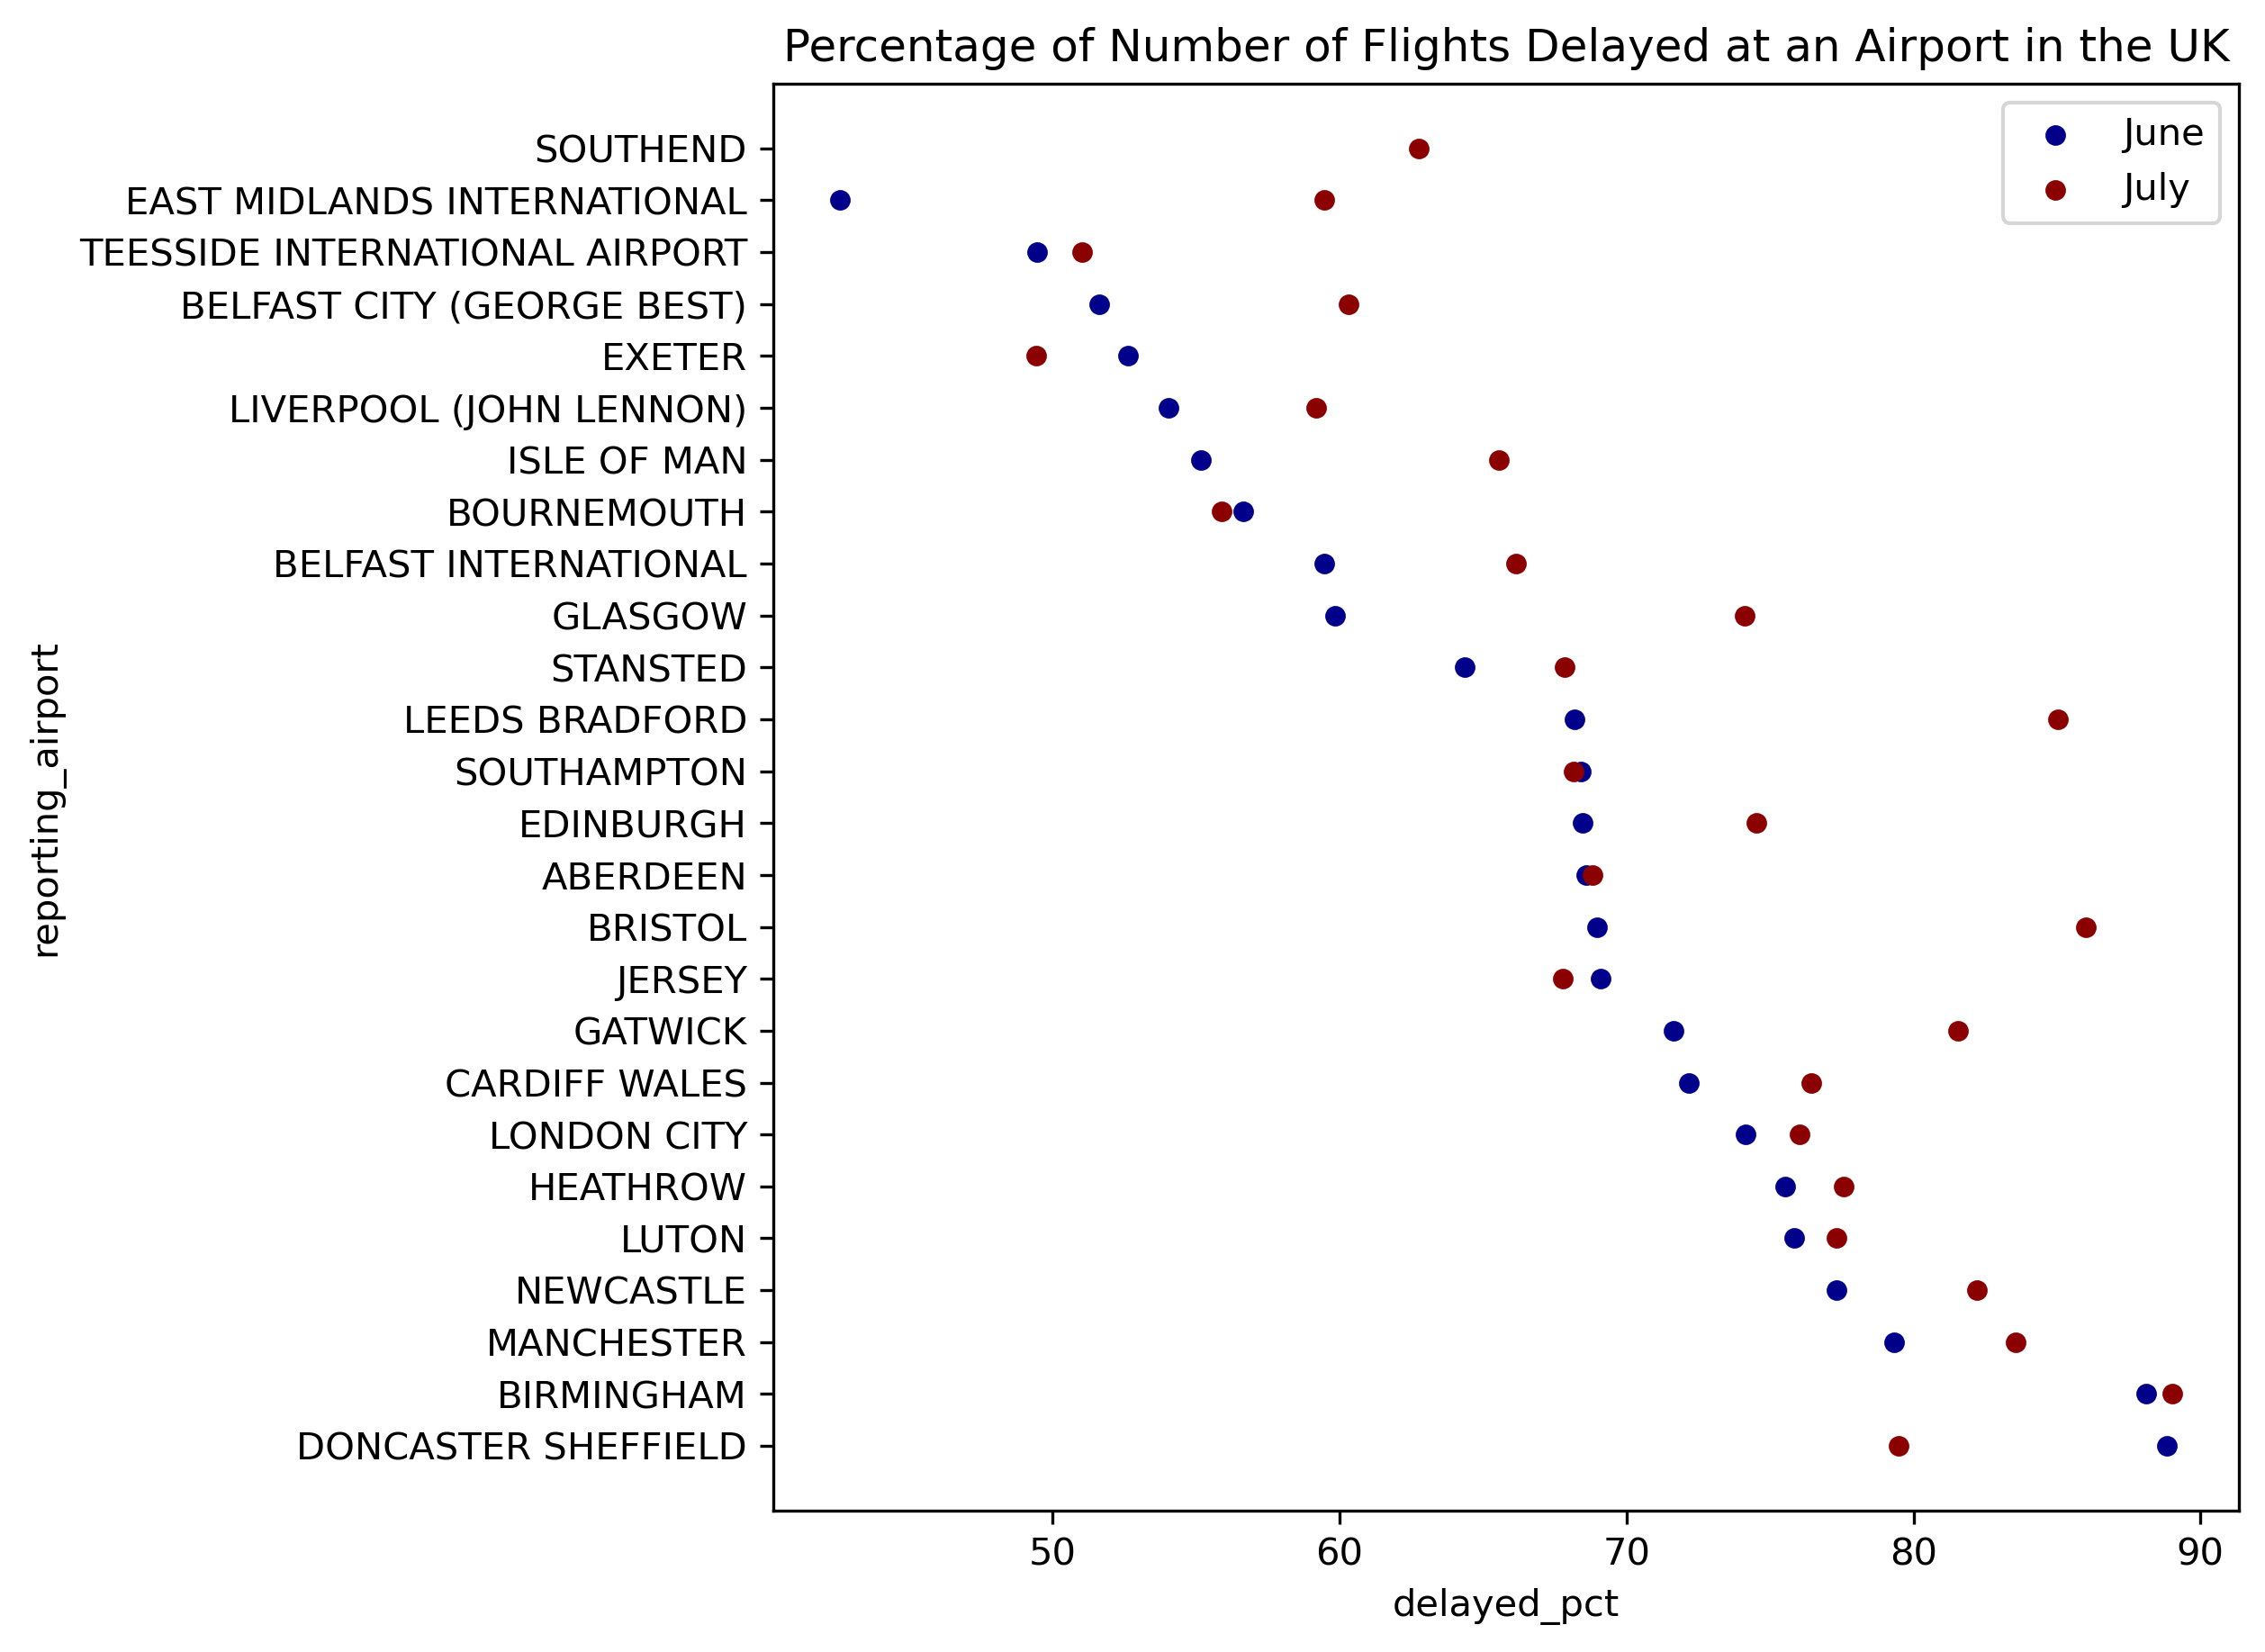

In [111]:
ax = airport_flights_df_june.sort_values(by='delayed_pct',ascending=False)[['reporting_airport','delayed_pct']].plot(kind='scatter',y='reporting_airport',x='delayed_pct',figsize=(7,7),color='DarkBlue', label='June',title='Percentage of Number of Flights Delayed at an Airport in the UK')
airport_flights_df_july.sort_values(by='delayed_pct',ascending=False)[['reporting_airport','delayed_pct']].plot(kind='scatter',y='reporting_airport',x='delayed_pct',color='DarkRed', label='July',ax=ax)

**Observation :**<br>
* The maximum percentage of flights delayed in June was at Birmingham where almost 89% of the flights were delayed <br>
* The maximum percentage of flights delayed in July was at Doncaster Sheffield where almost 88% of the flights were delayed <br>
* The minimum percentage of flights delayed in June was at East Midlands International where only 15% of the flights were delayed <br>
* The minimum percentage of flights delayed in July was at Exeter where about 50% of the flights were delayed <br>
* The notable airport with percent changes are East Midlands, Leeds and Bristol.
* Percentage of flights delayed in East Midlands was at around 15% which increased to 60% in July.
* Percentage of flights delayed in Leeds was at around 70% in June which increased to 85% in July.
* Percentage of flights delayed in Bristol was at around 70% in June which increased to 85% in July.
* Exeter, Doncaster Sheffield and Jersey had decreased percentage of flights delayed in July compared to June.
